In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

Saving titanic.csv to titanic (2).csv


Завдання 2.
Завантажити датасет Титанік з Kaggle (або
використовуйте вже завантажений файл titanic.csv)



In [43]:
#1. Вивести перших 5 рядків.

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [44]:
#2. Визначити розмір датасета.

df.shape

(418, 12)

In [45]:
#3. Визначити тип даних.

df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [46]:
#4. Визначити наявність пропущених значень. При наявності, замінити пропущені значення на середнє значення.

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [47]:
df = df.fillna(df.mean(numeric_only=True), axis=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
#5. Ще раз перевірити наявність пропущених значень

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [49]:
#6. Перевірити наявність дублікатів. При наявності видалити дублікати.

df.duplicated().sum()

0

In [50]:
#7. Вивести описову статистику датасету describe()

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [51]:
#8. Видалити стовпчик Cabin

df = df.drop(columns=['Cabin'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [52]:
#9. Сформувати датасет з обраними стовпцями:['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
df1 = df[selected_columns]
df1.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


In [53]:
#10.Замінити бінарні ознаки (Стать) на 0 і 1 (але перевірте унікальні значення даного стовпчика).

unique_values = df1['Sex'].unique()
print("Унікальні значення в стовпці 'Sex':", unique_values)
df1['Sex'] = df1['Sex'].map({'female': 0, 'male': 1})
df1.head()

Унікальні значення в стовпці 'Sex': ['male' 'female']


<ipython-input-53-b2e9c668eb8a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sex'] = df1['Sex'].map({'female': 0, 'male': 1})


,Survived,Pclass,Sex,Age,Fare
0,0,3,1,34.5,7.8292
1,1,3,0,47.0,7.0000
2,0,2,1,62.0,9.6875
3,0,3,1,27.0,8.6625
4,1,3,0,22.0,12.2875


In [55]:
#11.Ще раз перевірити кількість пропущених даних (впевнитись, що їх немає).

df1.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0


In [56]:
#12.Вивести 5 перших рядків датасету.

df1.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,34.5,7.8292
1,1,3,0,47.0,7.0000
2,0,2,1,62.0,9.6875
3,0,3,1,27.0,8.6625
4,1,3,0,22.0,12.2875


In [57]:
#13.Вивести 5 останніх рядків датасету.

df1.tail()

,Survived,Pclass,Sex,Age,Fare
413,0,3,1,30.27259,8.0500
414,1,1,0,39.00000,108.9000
415,0,3,1,38.50000,7.2500
416,0,3,1,30.27259,8.0500
417,0,3,1,30.27259,22.3583


In [58]:
#14.Аналіз виживання залежно від статі: Обчисліть відсоток виживання для кожної статі. Чи була різниця у виживанні між чоловіками та жінками?

survival_rates = df1.groupby('Sex')['Survived'].mean() * 100

print("Відсоток виживання для кожної статі:")
print(survival_rates)


Відсоток виживання для кожної статі:
Sex
0    100.0
1      0.0
Name: Survived, dtype: float64


Дивлячись на результат, робимо висновок що всі чоловіки померли, а жінки вижили

In [72]:
#15.Обчисліть відсоток виживання для кожного класу (Pclass). Який клас мав найвищий рівень виживання (дати відповідь)?

survival_rates_by_class = df1.groupby('Pclass')['Survived'].mean() * 100
print("Відсоток виживання для кожного класу:")
print(survival_rates_by_class)
highest_survival_class = survival_rates_by_class.idxmax()
highest_survival_rate = survival_rates_by_class.max()
print(f"Клас з найвищим рівнем виживання: {highest_survival_class} (відсоток: {highest_survival_rate:.2f}%)")

Відсоток виживання для кожного класу:
Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64
Клас з найвищим рівнем виживання: 1 (відсоток: 46.73%)


1 клас має найвищий рівень виживання

In [71]:
#16. Визначте середній вік тих, хто вижив, і тих, хто не вижив. Чи впливає вік на виживання (дати відповідь)?

average_age_by_survival = df1.groupby('Survived')['Age'].mean()
print("Середній вік для кожної категорії виживання:")
print(average_age_by_survival)

Середній вік для кожної категорії виживання:
Survived
0    30.272699
1    30.272400
Name: Age, dtype: float64


Бачимо, що вік не впливає на виживання(середній вік майже однаковий)

In [70]:
#17. Розподіліть пасажирів на групи за рівнями тарифів (Fare) і обчисліть рівень виживання для кожної групи. Як тариф впливав на шанси виживання (дати відповідь)?

bins = [0, 10, 20, 40, 520]
labels = ['0-10', '10-20', '20-40', '40-520']

survival_rates_by_fare_group = df.groupby(pd.cut(df1['Fare'], bins=bins, labels=labels))['Survived'].mean() * 100
print("Рівень виживання для кожної групи тарифів:")
print(survival_rates_by_fare_group)

Рівень виживання для кожної групи тарифів:
Fare
0-10      27.450980
10-20     31.707317
20-40     41.935484
40-520    51.136364
Name: Survived, dtype: float64


<ipython-input-70-5438ddc6c16c>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates_by_fare_group = df.groupby(pd.cut(df1['Fare'], bins=bins, labels=labels))['Survived'].mean() * 100


Більший відсоток виживших в тих хто мав максимальний тариф

In [69]:
#18.Аналіз класу та тарифу: Визначте середній тариф (Fare) для кожного класу (Pclass). Чи існує значна різниця у тарифах між класами (дати відповідь)?

average_fare_by_class = df1.groupby('Pclass')['Fare'].mean()
print("Середній тариф для кожного класу:")
print(average_fare_by_class)

Середній тариф для кожного класу:
Pclass
1    94.280297
2    22.202104
3    12.565951
Name: Fare, dtype: float64


Бачимо, що різниця у тарифах між класами існує

In [68]:
#19. Обчисліть середній вік пасажирів для кожного класу (Pclass). Як вік пасажирів розподіляється за класами (дати відповідь)?

average_age_by_class = df1.groupby('Pclass')['Age'].mean()
print("Середній вік пасажирів для кожного класу:")
print(average_age_by_class)

Середній вік пасажирів для кожного класу:
Pclass
1    40.022928
2    28.857881
3    26.090397
Name: Age, dtype: float64


 Бачимо, що середній вік пасажирів у першому класі значно вищий, ніж у другому чи третьому класах, це може свідчити про те, що більш заможні пасажири (які обирають перший клас) зазвичай старші.

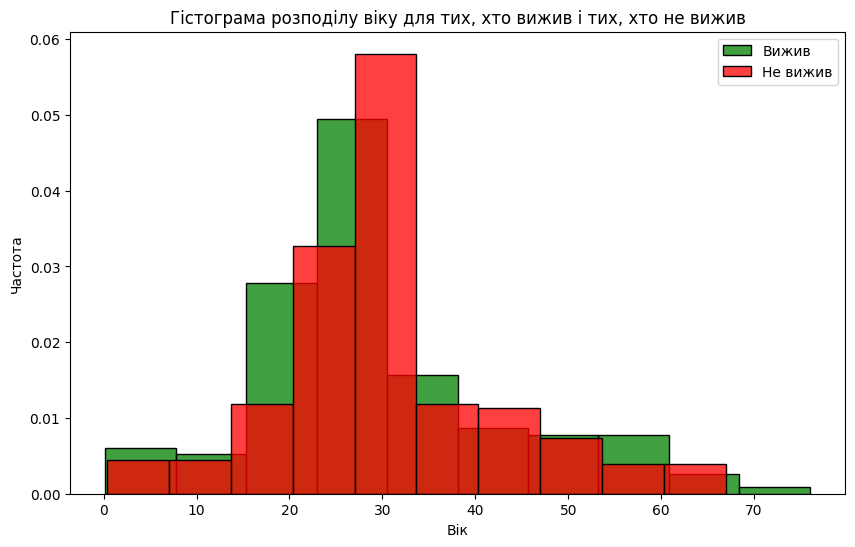

In [67]:
#20. Побудуйте гістограму розподілу віку для тих, хто вижив, і тих, хто не вижив. Чи є видимі відмінності у вікових групах (дати відповідь)?

survived = df1[df1['Survived'] == 1]['Age']
not_survived = df1[df1['Survived'] == 0]['Age']
plt.figure(figsize=(10, 6))
sns.histplot(survived, bins=10, color='green', label='Вижив', kde=False, stat="density", common_norm=False)
sns.histplot(not_survived, bins=10, color='red', label='Не вижив', kde=False, stat="density", common_norm=False)
plt.title('Гістограма розподілу віку для тих, хто вижив і тих, хто не вижив')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.legend()
plt.show()

На графіку видно ,що більш постраждалих людей середнього віку

In [66]:
#21. Обчисліть відсоток виживання для кожної комбінації статі та класу (наприклад, жінки в 1-му класі, чоловіки в 3-му класі). Яка група мала найвищий рівень виживання (дати відповідь)?

survival_rates = df1.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
print("Відсоток виживання для кожної комбінації статі та класу:")
print(survival_rates)
highest_survival_group = survival_rates.idxmax()
highest_survival_rate = survival_rates.max()
print(f"Група з найвищим рівнем виживання: {highest_survival_group} - {highest_survival_rate:.2f}%")

Відсоток виживання для кожної комбінації статі та класу:
Sex  Pclass
0    1         100.0
     2         100.0
     3         100.0
1    1           0.0
     2           0.0
     3           0.0
Name: Survived, dtype: float64
Група з найвищим рівнем виживання: (0, 1) - 100.00%


Всі жінки вижили, а чоловіки померли

In [74]:
#22.Обчисліть кореляцію між усіма числовими змінними (Survived, Pclass, Age, Fare). Які змінні найбільш сильно корелюють з виживанням (дати відповідь)?

correlation_matrix = df1.corr()
print("Матриця кореляції між числовими змінними:")
print(correlation_matrix)

Матриця кореляції між числовими змінними:
          Survived    Pclass       Sex       Age      Fare
Survived  1.000000 -0.108615 -1.000000 -0.000011  0.191382
Pclass   -0.108615  1.000000  0.108615 -0.440782 -0.576619
Sex      -1.000000  0.108615  1.000000  0.000011 -0.191382
Age      -0.000011 -0.440782  0.000011  1.000000  0.326800
Fare      0.191382 -0.576619 -0.191382  0.326800  1.000000


Значення які найбільш корелюють з виживанням - це Fare

Висновок. В результаті аналізу та подальших розрахунків можемо зрозуміти, що всі чоловіки померли.Визначили значення які найбільш корелюють з виживанням Fare. Обчислили відсоток виживання для кожної комбінації статі та класу(всі чоловіки померли, а жінки вижили).Побудуйте гістограму розподілу віку для тих, хто вижив, і тих, хто не вижив. Обчислили середній вік пасажирів для кожного класу, в 1 класі подорожували більш зрілі люди. Та інші.